## Model Training

We'll attempt to train a multi-class support vector machine on our feature-engineered data.

### Retrieve feature-engineered data into pandas dataframe

In [ ]:
import config
import mysql
import mysql.connector
from mysql.connector import errorcode

# DB FUNCTIONS

def connect(db_name=None):
    if db_name:
        cnx = mysql.connector.connect(
            host = config.rds_host,
            user = config.rds_user,
            passwd = config.rds_password,
            database = db_name)
    else:
        cnx = mysql.connector.connect(
            host = config.rds_host,
            user = config.rds_user,
            passwd = config.rds_password)
    cursor = cnx.cursor()
    return cursor, cnx


In [2]:
import pandas as pd

cur, cnx = connect('instruments')
cur.execute('''SELECT * FROM feature_soup''')

df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
cnx.close()

In [3]:
#df.drop(columns=['predicted_tonic'])

KeyError: "['predicted_tonic'] not found in axis"

In [4]:
#data = df.drop(columns=['predicted_tonic']).set_index('sample_id')

data = df.set_index('sample_id')

In [5]:
import pandas as pd

cur, cnx = connect('instruments')
cur.execute('''SELECT * FROM samples WHERE sample_id < 2337''')

sample_info = pd.DataFrame(cur.fetchall())
sample_info.columns = [i[0] for i in cur.description]
cnx.close()

In [6]:
sample_info.set_index('sample_id', inplace=True)
sample_info.sample(5)

,instrument_name,note,expression,source,file_extension
sample_id,,,,,
541,Trumpet,Bb5,vib,Iowa2012,aif
322,Bassoon,F3,,Iowa2012,aif
1182,Cello,sulD,arco,Iowa2012,aif
542,Trumpet,Eb5,vib,Iowa2012,aif
1831,Marimba,B3,roll,Iowa2012,aif


In [7]:
data2 = data.join(sample_info)[:2336]
data2

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat107,feat108,feat109,feat110,feat111,instrument_name,note,expression,source,file_extension
sample_id,,,,,,,,,,,,,,,,,,,,,
1,0.000651,0.000651,0.000138,0.000057,0.001024,0.176520,1.000000,0.177797,0.001062,0.000069,...,-0.063791,0.029180,-0.432102,0.002363,0.106840,Flute,Gb6,vib,Iowa2012,aif
2,0.008270,0.002053,0.006254,0.002936,0.007125,0.017867,0.003585,0.001006,0.006678,0.264093,...,0.027036,-0.015611,-0.412163,0.077486,-0.058987,Flute,Bb5,vib,Iowa2012,aif
3,0.063194,0.060460,0.109658,0.147565,0.106379,0.105265,0.303622,1.000000,0.522034,0.129738,...,0.038565,0.383636,-0.012244,0.074364,-0.047276,Flute,G4,vib,Iowa2012,aif
4,0.033374,0.039540,0.412884,1.000000,0.257063,0.015973,0.008818,0.031373,0.027541,0.101917,...,0.039755,0.413088,-0.112571,-0.026906,0.092450,Flute,Eb5,vib,Iowa2012,aif
5,0.004330,0.000271,0.000292,0.005080,0.007371,0.000984,0.000427,0.004784,0.404424,1.000000,...,0.008647,-0.440476,-0.027855,0.010182,0.110186,Flute,A6,vib,Iowa2012,aif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332,0.130332,0.003070,0.002325,0.004633,0.003025,0.009038,0.011580,0.013798,0.007754,0.027939,...,-0.376988,0.608603,-0.300726,-0.134148,-0.226386,Crotale,B7,,Iowa2012,aif
2333,0.187011,0.297088,0.060629,0.762868,0.712219,0.112696,0.111486,0.023948,0.013280,0.023884,...,-0.049706,0.078925,-0.350867,0.024020,0.086914,Crotale,Gb6,,Iowa2012,aif
2334,0.006895,0.014016,0.030444,0.018980,0.019424,0.035470,0.029394,0.030488,0.715370,1.000000,...,-0.003958,-0.431230,-0.016592,0.002291,0.105077,Crotale,A7,,Iowa2012,aif


In [8]:
X = data2[[f'feat{i}' for i in range(112)]]
y = data2['instrument_name']

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn import svm
from sklearn.model_selection import train_test_split

import numpy as np

In [10]:
from sklearn import decomposition

np.random.seed(5)

pca = decomposition.PCA(n_components=7)
pca.fit(X)
X2 = pca.transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [25]:
rfc = RFC(criterion='entropy', n_estimators=500, min_impurity_decrease=0.1, max_depth=5, max_features=2)

In [26]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
y_pred = rfc.predict(X_test)

In [28]:
results = list(zip(list(y_pred), list(y_test)))

In [29]:
len([x for x in results if x[0]==x[1]]) / len(results)

0.3034188034188034

In [30]:
results

[('Marimba', 'Horn'),
 ('Marimba', 'Flute'),
 ('Marimba', 'Viola'),
 ('Marimba', 'Violin'),
 ('Marimba', 'Marimba'),
 ('Marimba', 'Marimba'),
 ('Marimba', 'Viola'),
 ('Marimba', 'Marimba'),
 ('Marimba', 'BassFlute'),
 ('Marimba', 'Marimba'),
 ('Marimba', 'Bass'),
 ('Bass', 'Bass'),
 ('Marimba', 'SopSax'),
 ('Marimba', 'Xylophone'),
 ('Cello', 'Cello'),
 ('Marimba', 'Marimba'),
 ('Marimba', 'Marimba'),
 ('Bass', 'Bass'),
 ('Marimba', 'bells'),
 ('Bass', 'Cello'),
 ('Marimba', 'Marimba'),
 ('Marimba', 'Tuba'),
 ('Marimba', 'Flute'),
 ('Marimba', 'Vibraphone'),
 ('Marimba', 'Viola'),
 ('Marimba', 'AltoFlute'),
 ('Marimba', 'Violin'),
 ('Marimba', 'Flute'),
 ('Violin', 'TenorTrombone'),
 ('Marimba', 'Vibraphone'),
 ('Marimba', 'Marimba'),
 ('Marimba', 'TenorTrombone'),
 ('Bass', 'Bass'),
 ('Bass', 'Cello'),
 ('Marimba', 'Cello'),
 ('Marimba', 'bells'),
 ('Marimba', 'Xylophone'),
 ('Marimba', 'BbClarinet'),
 ('Bass', 'Bass'),
 ('Marimba', 'Vibraphone'),
 ('Marimba', 'Viola'),
 ('Marimba', '

In [31]:
from sklearn.svm import SVC

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X2 = scaler.transform(X)

In [33]:
from sklearn import decomposition

np.random.seed(5)

pca = decomposition.PCA(n_components=12)
pca.fit(X2)
X3 = pca.transform(X2)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
svc = SVC(kernel='poly', gamma='auto')

In [36]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
y_pred = svc.predict(X_test)

In [38]:
results = list(zip(list(y_pred), list(y_test)))

In [39]:
len([x for x in results if x[0]==x[1]]) / len(results)

0.717948717948718

In [40]:
results

[('Cello', 'Cello'),
 ('EbClarinet', 'BbClarinet'),
 ('BassFlute', 'AltoSax'),
 ('Cello', 'Bass'),
 ('Violin', 'Violin'),
 ('Marimba', 'Marimba'),
 ('Vibraphone', 'Vibraphone'),
 ('Bass', 'Bass'),
 ('Cello', 'Cello'),
 ('Viola', 'Viola'),
 ('Violin', 'Violin'),
 ('Tuba', 'Tuba'),
 ('SopSax', 'Violin'),
 ('Marimba', 'Marimba'),
 ('Cello', 'Cello'),
 ('Marimba', 'Marimba'),
 ('Marimba', 'Marimba'),
 ('Horn', 'Viola'),
 ('Viola', 'Viola'),
 ('AltoSax', 'SopSax'),
 ('Violin', 'Violin'),
 ('Flute', 'Flute'),
 ('Marimba', 'Marimba'),
 ('Trumpet', 'Trumpet'),
 ('Marimba', 'Marimba'),
 ('Marimba', 'Violin'),
 ('EbClarinet', 'Viola'),
 ('AltoSax', 'EbClarinet'),
 ('bells', 'Crotale'),
 ('AltoFlute', 'BbClarinet'),
 ('AltoFlute', 'BassFlute'),
 ('Xylophone', 'Xylophone'),
 ('Flute', 'bells'),
 ('Xylophone', 'Xylophone'),
 ('Marimba', 'Marimba'),
 ('Xylophone', 'Xylophone'),
 ('Xylophone', 'Marimba'),
 ('SopSax', 'Viola'),
 ('Marimba', 'Vibraphone'),
 ('Marimba', 'Marimba'),
 ('Marimba', 'Marimba

In [ ]:
df3 = pd.concat([pd.DataFrame(X3).iloc[:,0:2], pd.DataFrame(list(y))], axis=1, ignore_index=True)
df3.columns=['A', 'B', 'Instrument']
df3

In [ ]:
import seaborn as sns

g = sns.pairplot(x_vars=['A'], y_vars=['B'], data=df3, hue='Instrument')
g.fig.set_size_inches(20,8)

In [ ]:
df3['Instrument'].value_counts()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X2 = scaler.transform(X)

In [ ]:
from sklearn import decomposition

np.random.seed(5)

pca = decomposition.PCA(n_components=19)
pca.fit(X2)
X3 = pca.transform(X2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN(n_neighbors=7, weights='uniform', algorithm='auto', leaf_size=30, p=2,
          metric='minkowski', metric_params=None, n_jobs=None)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
results = list(zip(list(y_pred), list(y_test)))

In [ ]:
len([x for x in results if x[0]==x[1]]) / len(results)

In [ ]:
results

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X2 = scaler.transform(X)

In [ ]:
#from sklearn import decomposition

#np.random.seed(5)

#pca = decomposition.PCA(n_components=19)
#pca.fit(X2)
#X3 = pca.transform(X2)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
from xgboost import XGBClassifier

In [50]:
xgb = XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.1)

In [51]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [52]:
y_pred = xgb.predict(X_test)

In [53]:
results = list(zip(list(y_pred), list(y_test)))

In [54]:
len([x for x in results if x[0]==x[1]]) / len(results)

0.8311965811965812

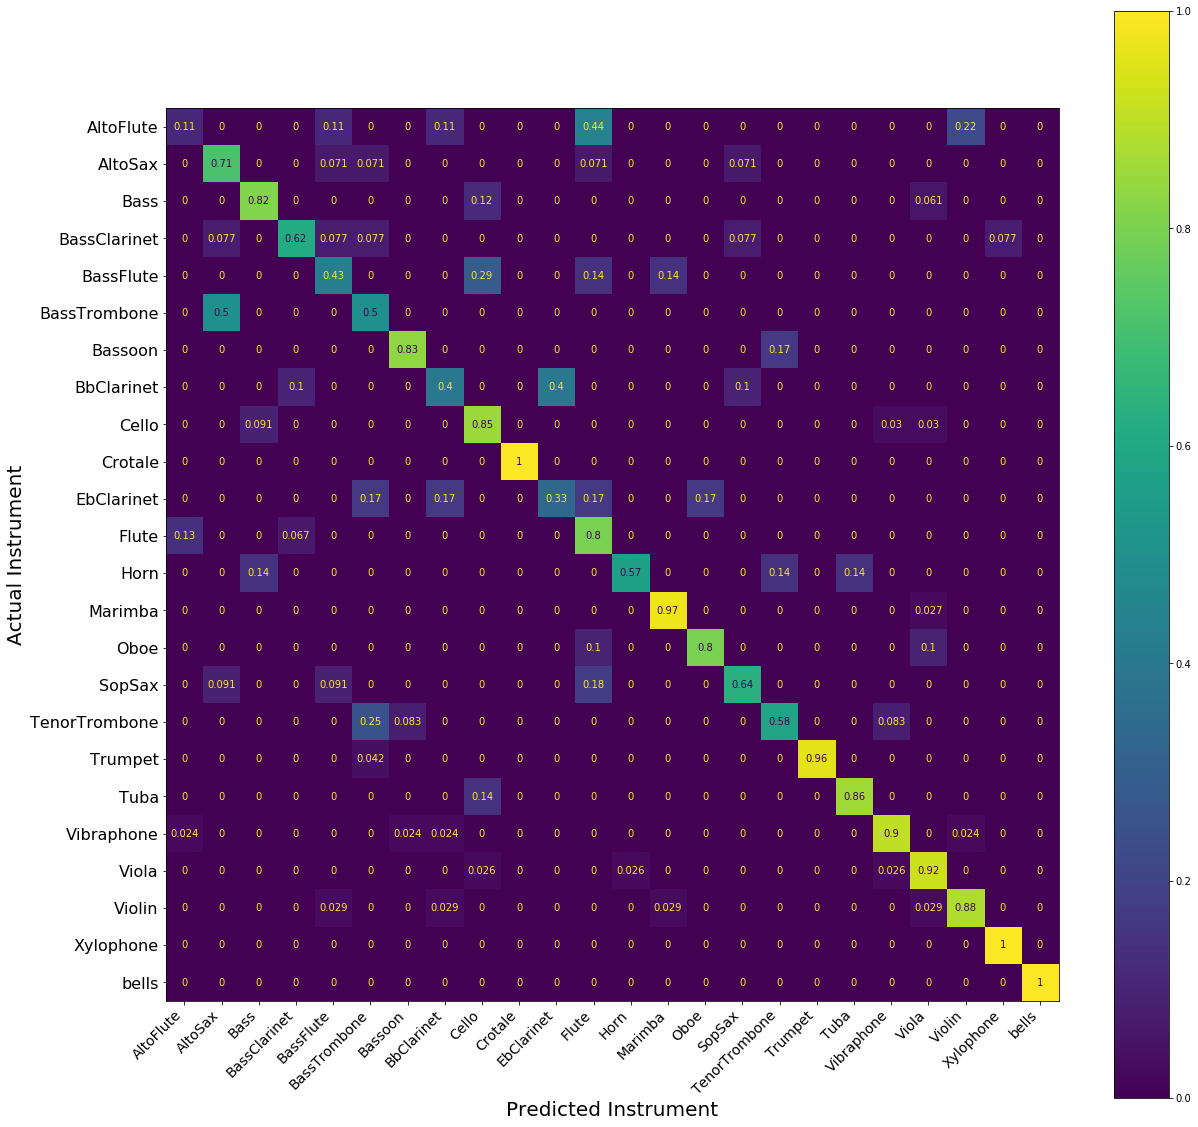

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))
plot_confusion_matrix(xgb, X_test, y_test, normalize='true', ax=ax)
ax.set_xlabel("Predicted Instrument", fontsize=20)
ax.set_ylabel("Actual Instrument", fontsize=20)
for label in ax.get_xticklabels():
    label.set_fontsize(14) 
    label.set_ha("right")
    label.set_rotation(45)

for label in ax.get_yticklabels():
    label.set_fontsize(16) 

In [ ]:
results

In [ ]:
list(dict(y.value_counts()).keys())

In [ ]:
group_dict = {}

for inst in ['Marimba', 'Vibraphone', 'Xylophone', 'bells', 'Crotale']:
    group_dict[inst] = 'Percussion'
    
for inst in ['Bass', 'Viola', 'Cello', 'Violin']:
    group_dict[inst] = 'Strings'
    
for inst in ['Flute', 'AltoSax', 'SopSax', 'BbClarinet', 'BassClarinet',
             'Bassoon','EbClarinet','BassFlute','AltoFlute', 'Oboe']:
    group_dict[inst] = 'Woodwind'

for inst in ['Trumpet', 'Horn', 'Tuba', 'TenorTrombone', 'BassTrombone']:
    group_dict[inst] = 'Brass'

In [ ]:
y2 = y.apply(lambda x: group_dict[x])
y2.value_counts()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X2 = scaler.transform(X)

In [ ]:
from sklearn import decomposition

np.random.seed(5)
pca = decomposition.PCA(n_components=20)
pca.fit(X2)
X3 = pca.transform(X2)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train2, y_train2)

In [ ]:
y_pred = xgb.predict(X_test2)

In [ ]:
results = list(zip(list(y_pred), list(y_test2)))

In [ ]:
len([x for x in results if x[0]==x[1]]) / len(results)

In [ ]:
results